# MATH 210 Introduction to Mathematical Computing

## April 8, 2022

* Eigenvalues and eigenvectors
* Diagonalization
* Orthogonal diagonalization of symmetric matrices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Eigenvalues and eigenvectors

Let $A$ be a square matrix. A number $\lambda$ is an eigenvalue of $A$ if

$$
A \mathbf{v} = \lambda \mathbf{v}
$$

for some nonzero vector $\mathbf{v}$. The vector $\mathbf{v}$ is called an eigenvector for $\lambda$.

We can find eigenvalues of small matrices (like size $n \leq 4$) by computing roots of the characteristic polynomial

$$
c_A(x) = \mathrm{det}(A - x I)
$$

where $I$ is the identity matrix (same size as $A$).

But this is not how `scipy.linalg.eig` computes eigenvalues.

Use `la.eig` to compute eigenvalues of

$$
A = \begin{bmatrix} 1 & 2 \\ 2  & 1 \end{bmatrix}
$$

In [2]:
A = np.array([[1,2],[2,1]])
result = la.eig(A)

In [3]:
type(result)

tuple

In [4]:
evals = result[0]
evals

array([ 3.+0.j, -1.+0.j])

In [5]:
evecs = result[1]
evecs

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

The function `scipy.linalg.eig` returns a `tuple` of length 2 with 1D NumPy array of eigenvalues and 2D NumPy array with corresponding eigenvectors in the columns. Notice the eigenvalue vector always has complex numbers even if the eigenvalues are real.

Eigenvalues of real symmetric matrices are **always** real numbers. So we can use the function `np.real` to get the real part.

In [6]:
evals = np.real(evals)
evals

array([ 3., -1.])

Verify $A \mathbf{v}_0 = \lambda_0 \mathbf{v}_0$:

In [7]:
v0 = evecs[:,0]
v0

array([0.70710678, 0.70710678])

In [8]:
A @ v0

array([2.12132034, 2.12132034])

In [9]:
evals[0]*v0

array([2.12132034, 2.12132034])

## Diagonalization

Suppose that $A$ is size $n$ with $n$ eigenvalues and $n$ linearly independent eigenvectors. Then $A = PDP^{-1}$ where

$$
D = \begin{bmatrix} \lambda_0 & & \\ & \ddots & \\ & & \lambda_{n-1} \end{bmatrix}
\hspace{10mm}
P = \begin{bmatrix} & & \\ \mathbf{v}_0 & \cdots & \mathbf{v}_{n-1} \\ & & \end{bmatrix}
$$

Then it is easy to compute powers of $A$:

$$
A^k = (PDP^{-1})^k = PDP^{-1} PDP^{-1} \cdots PDP^{-1} = PD^kP^{-1}
$$

In [10]:
A

array([[1, 2],
       [2, 1]])

In [11]:
A @ A @ A

array([[13, 14],
       [14, 13]])

In [12]:
D = np.diag(evals)
D

array([[ 3.,  0.],
       [ 0., -1.]])

In [13]:
P = evecs
P

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [14]:
P @ D**3 @ la.inv(P)

array([[13., 14.],
       [14., 13.]])

## Symmetric matrices

Let $A$ be a symmetric matrix of size $n$.

* The eigenvalues of $A$ are **real** numbers
* The eigenvectors (corresponding to different eigenvalues) of $A$ are orthogonal
* $A$ is orthogonally diagonalizable $A = PDP^T$

In [15]:
N = 50
A = 2*np.eye(N) - np.diag(np.ones(N-1),1) - np.diag(np.ones(N-1),-1)
A

array([[ 2., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  2., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  2., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  2.]])

In [16]:
result = la.eig(A)
evals = np.real(result[0])
evecs = result[1]
evals

array([3.99620666e+00, 3.98484102e+00, 3.96594620e+00, 3.93959387e+00,
       3.90588400e+00, 3.86494446e+00, 3.81693054e+00, 3.76202439e+00,
       3.70043427e+00, 3.63239382e+00, 3.55816115e+00, 3.47801783e+00,
       3.39226789e+00, 3.30123660e+00, 3.20526927e+00, 3.10472995e+00,
       3.00000000e+00, 2.89147671e+00, 2.77957175e+00, 2.66470960e+00,
       2.54732598e+00, 2.42786617e+00, 2.30678331e+00, 2.18453672e+00,
       2.06159012e+00, 1.93840988e+00, 1.81546328e+00, 1.69321669e+00,
       1.57213383e+00, 1.45267402e+00, 1.33529040e+00, 1.22042825e+00,
       1.10852329e+00, 3.79334253e-03, 1.51589807e-02, 3.40538006e-02,
       6.04061279e-02, 9.41159991e-02, 1.35055541e-01, 1.83069456e-01,
       2.37975611e-01, 2.99565729e-01, 3.67606175e-01, 4.41838851e-01,
       5.21982166e-01, 6.07732108e-01, 6.98763400e-01, 7.94730727e-01,
       8.95270054e-01, 1.00000000e+00])

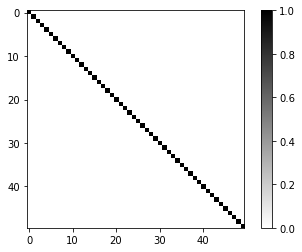

In [17]:
P = evecs
PPT = np.round(P @ P.T,5)
plt.imshow(PPT,cmap='binary'), plt.colorbar()
plt.show()

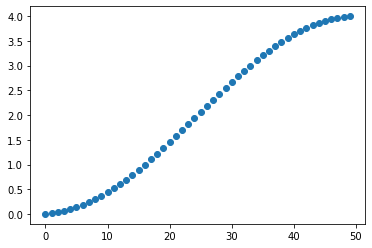

In [18]:
plt.scatter(range(N),np.sort(evals))
plt.show()